# Аналитика авиакомпании

В данном исследоение выясним на каких моделях самолетов производится больше всего вылетов, какие города принимают больше всего самолетов на посадку и правда, что спрос на авиабилеты возрастает в тот город в котором проводится большой фестиваль.

### Подготовка данных

_для начала подгрузим интересующие нас библиотеки и методы_

In [4]:
import pandas as pd
import numpy as np

# импортируем графические модули
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from scipy import stats as st

_Подгрузим интересующие нас таблицы_

In [5]:
df_plane = pd.read_csv('/datasets/query_1.csv') 
df_flyght = pd.read_csv('/datasets/query_3.csv') 
df_festival = pd.read_csv('/datasets/query_last.csv') 

_По очереди проверим на отсутствие значений и другие аномалии в данных._

In [6]:
df_plane.info()
df_plane.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [7]:
df_flyght.info()
df_flyght.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [8]:
df_festival.info()
df_festival.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 400.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


_Все отлично, еще бы мы же их сами готовили в sql. Но есть небольшой недочет в таблице "фестивали". Там дублированный столбец от которого стоит просто избавится и значение Nan заменить на удовлетворяющую нам строку для обработки и понимания._

In [9]:
df_festival.drop('festival_week', axis=1, inplace=True)
df_festival['festival_name'] = df_festival['festival_name'].fillna('not event')

In [10]:
df_festival.head()

,week_number,ticket_amount,festival_name
0,30,43568,Park Live
1,31,51034,Пикник Афиши
2,32,51675,not event
3,33,51378,not event
4,34,51492,not event


Готово. Теперь у нас есть удобные для восприятия и обработки таблицы. Данных не много из-за этого можем легко с ними рабоать.

### Исследование по городам

Определим города с наибольшим числом рейсов в виде вылета или посадки из этого города.

_Для выяснения используем простой метод sort_values по столбцу "среднее количество вылетов" и ограничением в 10 строк_

In [11]:
df_flyght.sort_values(by=['average_flights'], ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Как и ожидалось среднее значение рейсов через город Москву отличается кратно. Еще бы 4 аэропорта и крупный пересадочный хаб Европы и Азии. Но не только. Через Москву на данный момент летает вся Россия. В России очень мало рейсов из региональный аэропорт в региональный а так же любому жителю страны который не живет в первой 5 городов, чтобы вылететь зарубеж в отпуск необходимо сначала прилететь в Москву -  от сюда и цифра в 129 рейсов в среднем за Сентябрь.
    * На втром месте вторая столица - Санкт-Петербург в среднем 31.16 вылетов за месяц
    * Новосибирск - 17.32 вылетов за месяц
    * Красноярск - 11.5 вылетов за месяц

### Количество перелетов в разрезе моделей самолетов

_Будем использовать результирующаю таблицу и библиотеку matplotlib_

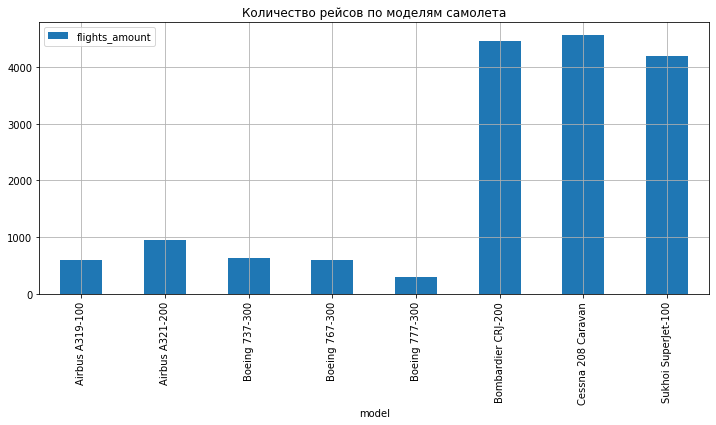

In [12]:
df_pl_top = df_plane.pivot_table (index = 'model', values=['flights_amount'], aggfunc='sum')
title_n = 'Количество рейсов по моделям самолета' 
df_pl_top.plot.bar(grid=True, figsize=(12, 5), title = title_n);

Россия страна большая но не плотно населенная, по этому и такие интересные показатели. График показывает, что обсолютное первество принадлежит среднематорным самолетам Bombardie и легкому Cessna, а дальше среднефюзеляжному отчественному superjet 100, с большим отставание идут модели от компаний Boing и Airbus. 
На мой взгляд это обуславливается в первую очредь политикой компании, на каких направлениях она больше всего присутствует а потом региональными факторами. Первые две модели могут садится на более простой аэродром а третий самолет в силу разных обстоятельств должен использоваться почти в обязательном порядке. Но маркетинг замыкающих производителей конечно же лучше так как такие данные вызвали большое удивление.

In [13]:
df_plane.sort_values(by=['flights_amount'], ascending=False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


### Среднее количество рейсов по городам

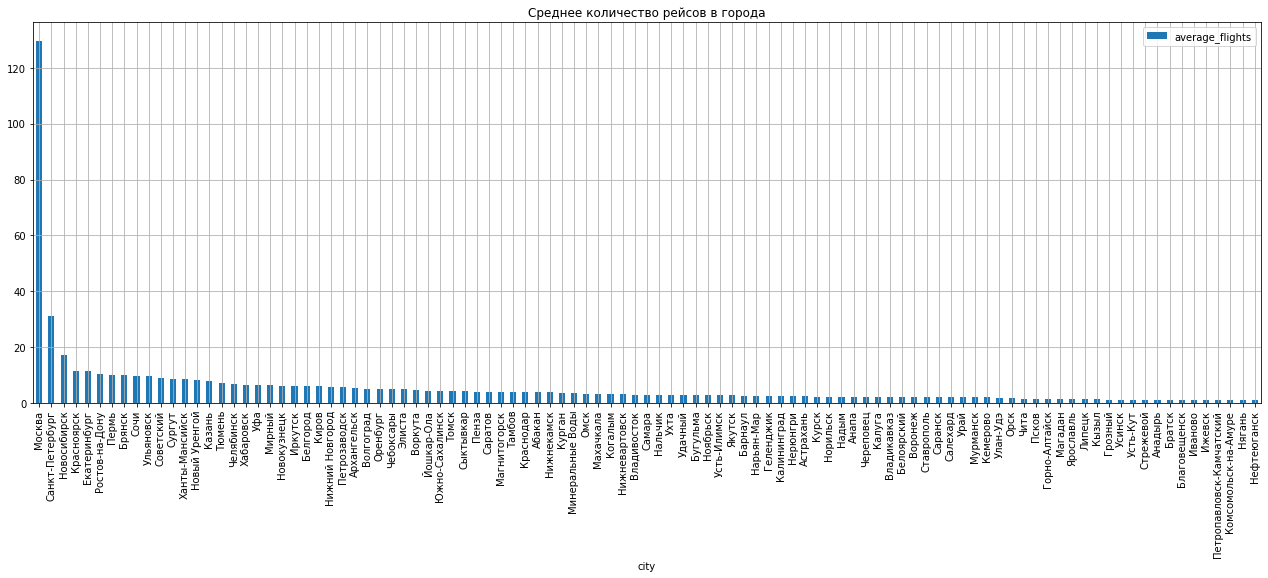

In [14]:
df_flyght_top = df_flyght.pivot_table (index = 'city', values=['average_flights'], aggfunc='sum')
df_flyght_top = df_flyght_top.sort_values(by=['average_flights'], ascending=False)
title_n = 'Среднее количество рейсов в города' 
df_flyght_top.plot.bar(grid=True, figsize=(22, 7), title = title_n);

Москву мы уже обсудили чуть выше. Теперь поговорим об остальном списке.
 * Несомненно второй по виличине и значимости в России это город Санкт-Петербург на который приходится около 25 рейсов самолетов в среднем.
 * Новосибирск (а куда ты еще полетиш если тебе надо в Сибирь) находится на третьем месте с 18 рейсами
 * а дальше мы видимсильным спад и плавную траекторию вниз и на мой взгляд небольшого количество городов и очень маленького трафика из рейсов. 
 * Первая десятка из крупных городов России принимает в среднем по 10 рейсов в месяц.
 
Для большого перевозчика с хорошим сервисом и открытой ценовой политикой такое небольшое присутствие в городах центральной России говорит о не очень хорошей мобильности граждан в целом по России.

### Топ 10 городов на графике

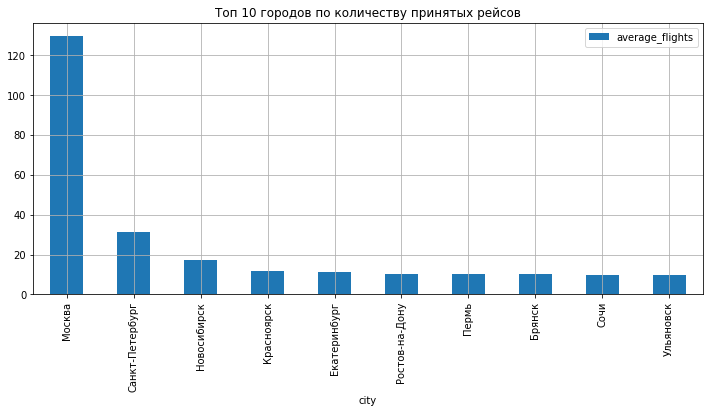

In [15]:
df_top10 = df_flyght_top.sort_values(by=['average_flights'], ascending=False).head(10)
title_n = 'Топ 10 городов по количеству принятых рейсов' 
df_top10.plot.bar(grid=True, figsize=(12, 5), title = title_n);

Тут просто визуально хорошо видно на сколько Москва выходит вперед по сравнению с остальными городами.

### Проверка гипотез

У нас есть небольшой срез данных в котором видно неделя когда проходил фестиваль в Москве и количество проданых в город Москву билетов. Попробуем выяснить зависит ли количество проданных билетов в неделю когда в Москве проходит крупный фестиваль или нет.

Гипотеза: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

Как нулевая теория задается, что билетов в неделю фестивалей продается похожее количество, что и в неделю без фестивалей.

Альтенативная - В неделю когда проходит фестиваль продается больше билетов, чем в неделю когда фестиваля не проводится.

Так как данных очень! мало то критическое значение зададим 5% так как выборка по средней будет сравнивать буквально несколько значений

In [16]:
df_not_event = df_festival.query('festival_name == "not event"')
df_event = df_festival.query('festival_name != "not event"')

In [23]:
variance_not_event = np.var(df_not_event['ticket_amount'])
variance_event = np.var(df_event['ticket_amount'])
print(f'Дисперсия для датасета с неделями фестивалей: {variance_event}')
print(f'Дисперсия для датасета с неделями без фестивалей: {variance_not_event}')

Дисперсия для датасета с неделями фестивалей: 12998464.888888888
Дисперсия для датасета с неделями без фестивалей: 14694.408163265309


In [17]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_not_event['ticket_amount'], 
    df_event['ticket_amount'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Исследование показывает, что спрос на билеты не отличается в недели когда проходят фестивали и когда фестивалей нет. А вообще из исселедования данных по проданым билетам в Москву мне показалось, что зависимость очень простая от недели к недели спрос растет и связываю я это только с порой когда людям пора возращаться из отпусков.

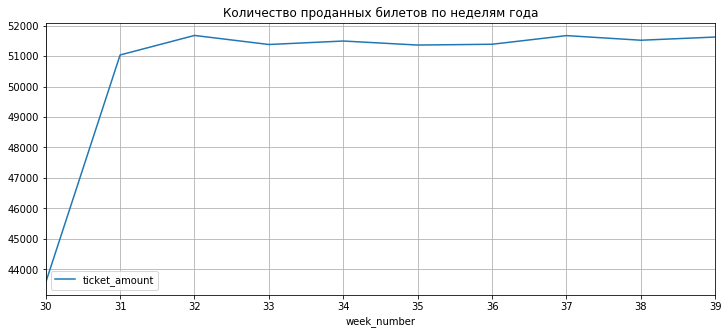

In [18]:
df_yr = df_festival.pivot_table(index = 'week_number', values=['ticket_amount'], aggfunc='sum')
title_n = 'Количество проданных билетов по неделям года' 
df_yr.plot(grid=True, figsize=(12, 5), title = title_n);